# Delta School District 
## Data And Systems Analyst - Technical Assessment

### Fetch and Store the data

In [1]:
import sys
import os
import sqlite3
import pandas as pd

sys.path.append(os.path.abspath('..'))

from scripts.api_calls import fetch_and_store_data, load_merged_data
from scripts.birthrate_calc import load_data_for_year, calculate_birth_probability
import matplotlib.pyplot as plt

In [2]:
# Fetch data and store into ../data/world_birth_data.db
fetch_and_store_data(db_path = "../data/world_birth_data.db")

[Success] Data successfully stored in ../data/world_birth_data.db


In [3]:
df = load_merged_data(db_path = "../data/world_birth_data.db")
df.head()

,Country,ISO3,Year,Birth_Rate_per_1000,Population
0,Africa Eastern and Southern,AFE,2023,32.954912,750503764
1,Africa Eastern and Southern,AFE,2022,33.320433,731821393
2,Africa Eastern and Southern,AFE,2021,33.681336,713090928
3,Africa Eastern and Southern,AFE,2020,34.010470,694446100
4,Africa Eastern and Southern,AFE,2019,34.335881,675950189


#### Common Years check
- Below is just a check to see what years are available for all countries, so that we can work with a common range as we are doing aggregations and it would be inaccurate if there are country statistics missing for some years.

In [4]:
temp = df.groupby('Country')['Year'].agg(['min', 'max'])
# print(temp.head())

common_start = temp['min'].max()
common_end = temp['max'].min()

print(f"Common year range is {common_start}:{common_end}")

Common year range is 1990:2023


In [5]:
df_2020 = load_data_for_year(2020, db_path='../data/world_birth_data.db')
df_2020.head()

,Country,Birth_Rate_per_1000,Population
0,Africa Eastern and Southern,34.010470,694446100
1,Africa Western and Central,34.417675,474569351
2,Arab World,24.407879,453723239
3,Caribbean small states,14.802311,4459302
4,Central Europe and the Baltics,9.705526,101215763


In [6]:
probability, total_global_births, canada_births = calculate_birth_probability(df_2020, 'Canada')
# print(canada_births)
# print(total_global_births)
# print(df_2020[df_2020['Country'] == "Canada"])

In [7]:
print(f"Probability of being born in Canada in 2020: {probability:.6f}%")

Probability of being born in Canada in 2020: 0.075738%


**Interpretation**: The probability that a person born in 2020 was born in Canada is approximately $0.0757\%$. In other words, for every $10,000$ babies born worldwide in $2020$, roughly $7.57$ we born in Canada.

In [8]:
# start_year = 2000
# end_year = 2020
# country = 'Canada'
# db_path = '../data/world_birth_data.db'

# Store results in a list
results = []

for year in range(1960, 2024):
    df_year = load_data_for_year(year, db_path = '../data/world_birth_data.db')
    if df_year.empty == True:
        print(f"No data for {year}, skipping...")
        continue

    probability, global_births, country_births = calculate_birth_probability(df_year, 'Canada')

    results.append({
        'Year': year,
        'Probability (%)': probability,
        'Country_Births': int(country_births),
        'Global_Births': int(global_births)
    })

# Convert results to DataFrame
prob_df = pd.DataFrame(results)
prob_df.head()

,Year,Probability (%),Country_Births,Global_Births
0,1960,0.068550,478179,697561641
1,1961,0.068530,475046,693197368
2,1962,0.075206,469072,623715633
3,1963,0.070258,466514,663998291
4,1964,0.068125,452204,663787538


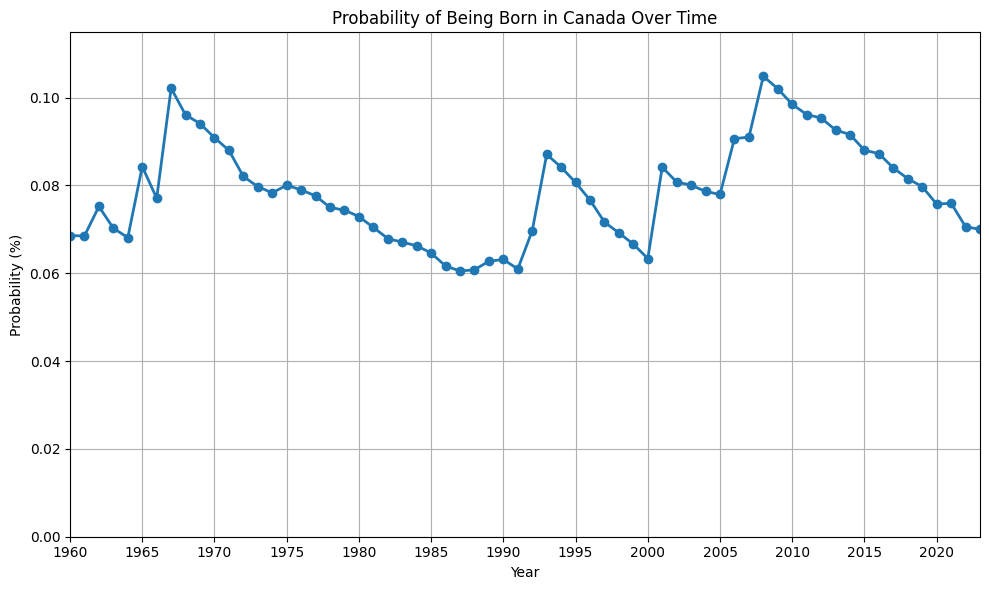

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(prob_df['Year'], prob_df['Probability (%)'], marker = 'o', linewidth=2)
plt.title("Probability of Being Born in Canada Over Time")
plt.xlabel("Year")
plt.ylabel("Probability (%)")
plt.xlim(1960, 2023)
plt.ylim(0, prob_df['Probability (%)'].max() + 0.01)
plt.xticks(range(1960, 2025, 5))
plt.grid(True)
plt.tight_layout()
plt.show()

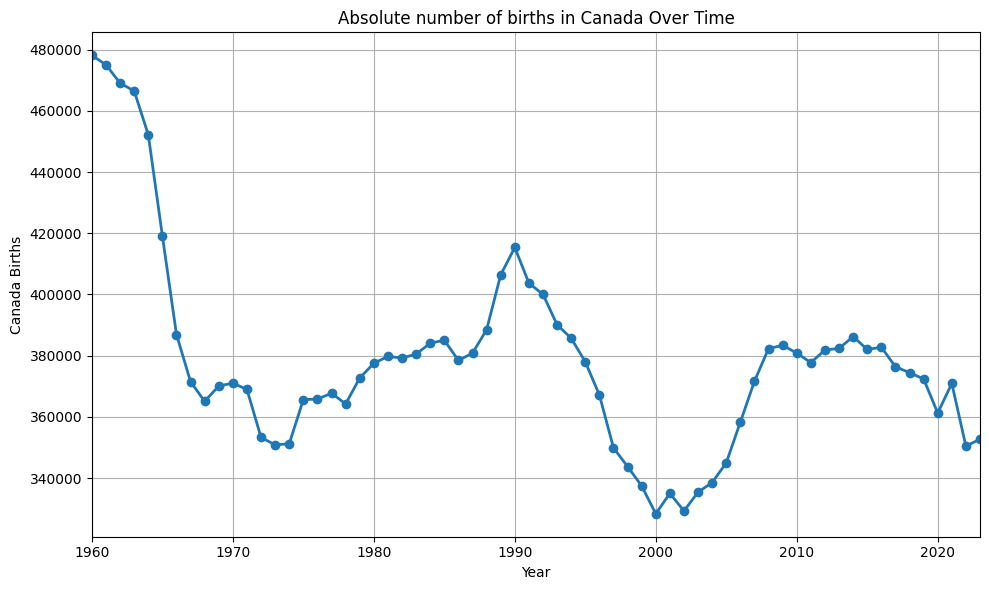

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(prob_df['Year'], prob_df['Country_Births'], marker = 'o', linewidth=2)
plt.title("Absolute number of births in Canada Over Time")
plt.xlabel("Year")
plt.ylabel("Canada Births")
plt.xlim(1960, 2023)
plt.grid(True)
plt.tight_layout()
plt.show()

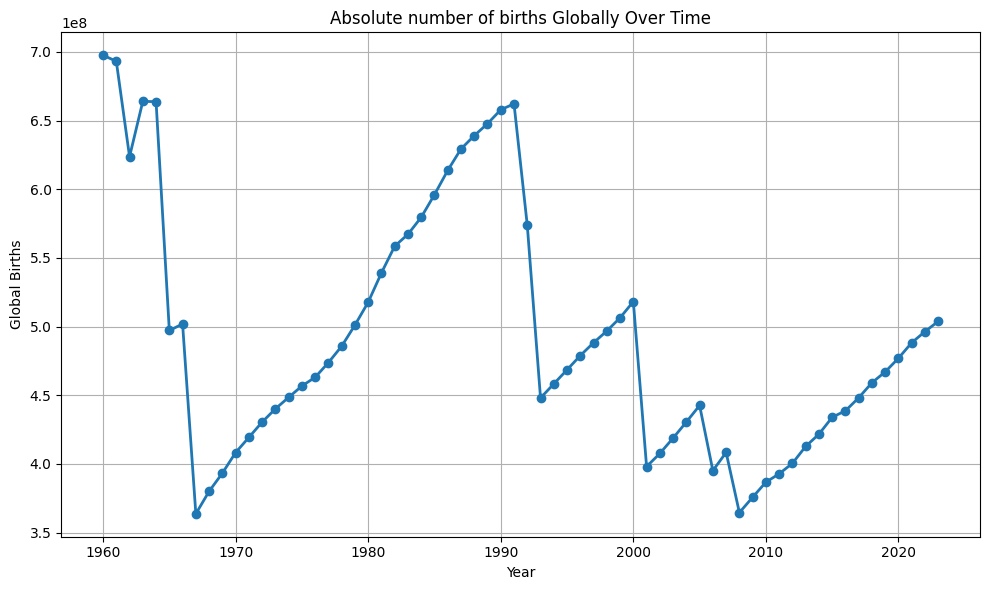

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(prob_df['Year'], prob_df['Global_Births'], marker = 'o', linewidth=2)
plt.title("Absolute number of births Globally Over Time")
plt.xlabel("Year")
plt.ylabel("Global Births")
plt.grid(True)
plt.tight_layout()
plt.show()